<a href="https://colab.research.google.com/github/Lagos1989s/titanic-analysis/blob/main/Task_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# 1. 匯入train.csv資料
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

In [2]:
# 2. Titanic 資料欄位定義

# PassengerId: 乘客編號
# survival:    是否生存，0:死亡 1:生存。
# pclass:      社會經濟地位替代指標，1:高 2:中 3:低。
# sex:         性別。
# Age:         年齡。
# sibsp:       在鐵達尼號上兄弟姊妹或配偶的數量。
# parch:       在鐵達尼號上父母或小孩的數量。
# ticket:      船票編號。
# fare:        乘客票價。
# cabin:       艙位編號。
# embarked:    登船港口, C = Cherbourg, Q = Queenstown, S = Southampton。

In [3]:
# 資料前處理
# 觀察資料狀況，如各欄位的統計指標、欄位的資料格式以及是否有遺漏值。
print (df.describe())
print (df.info())
print (df.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data colu

In [4]:
# Age、Cabin、Embarked的遺漏值處理

# 以不同性別的平均年齡補回年齡遺漏值。
# Age
df['Age'].fillna(value=df.groupby('Sex')['Age'].transform('mean'), inplace=True)

# Embarked
# 將Embarked轉為數值後，以眾數S補回。
print (df['Embarked'].mode())
df['Embarked'].replace(np.nan, 'S', inplace=True)

# Cabin的遺漏值高達總樣本數的77%，不考慮使用此特徵。

0    S
Name: Embarked, dtype: object


In [5]:
# 列出NAN的值
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [6]:
from sklearn import preprocessing

# 類別型的欄位編碼處理
# 對Sex欄位進行Label Encoding
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# 對Embarked欄位進行One-hot Encoding

df_dum = pd.get_dummies(df[['Embarked']])
df_dum

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [7]:
# 將df與df_new合併
df_new = pd.concat([df, df_dum], axis=1)

# 取分析所需要的欄位
df_fin = df_new[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
df_fin

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,27.915709,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


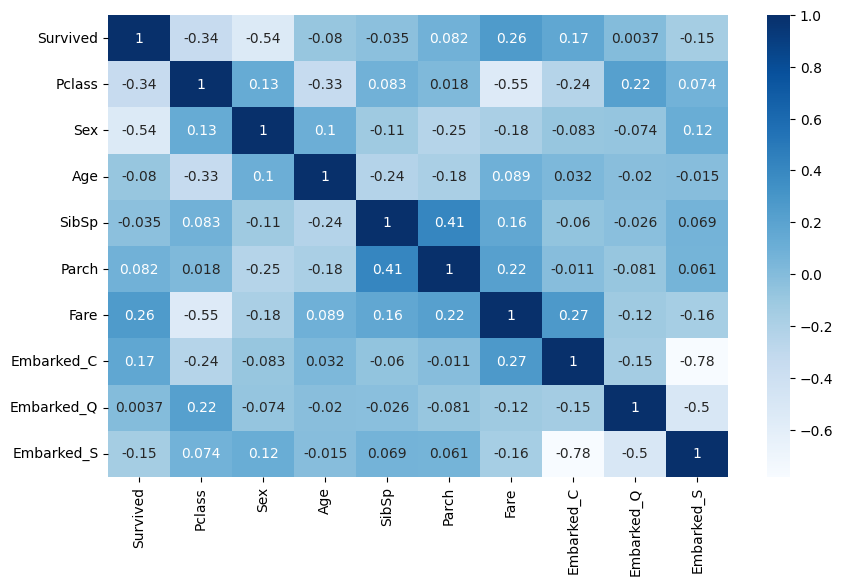

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. 觀察每一個「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_fin.corr(), annot=True, cmap='Blues')
plt.show()

# 透過繪製與Survived與其他欄位的相關係數熱力圖可以得知：
# 乘客是否有生存，與乘客的性別、社經地位高低、票價以及登船港口(Cherbourg, Southampton)有較大的關係。

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df_fin.drop('Survived', axis=1)
y = df_fin['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

# 利用Logistic Regression的係數得到Feature Importances
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})

importances = importances.sort_values(by='Importance', ascending=False)

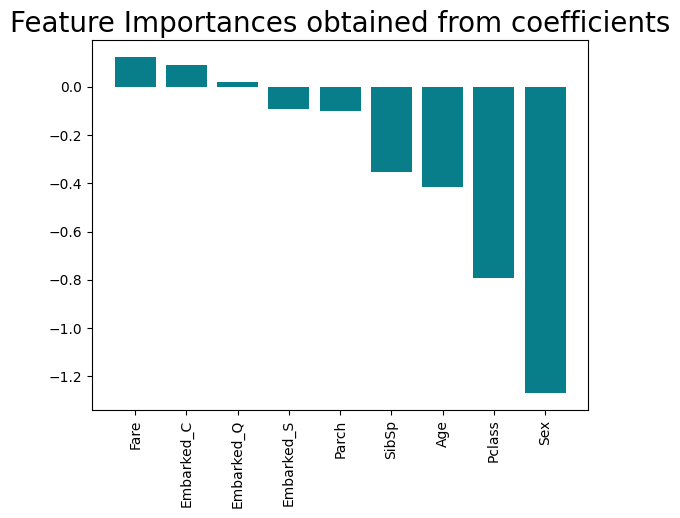

In [15]:
# 繪製Feature Importances

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# 利用Logistic Regression的係數所得出的Feature Importance則可以得知：
# 乘客生存的機率受到性別、社經地位、年齡、同船的兄弟姊妹或配偶人數影響。